In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 8.4 MB/s 
     |████████████████████████████████| 6.8 MB 54.1 MB/s 
     |████████████████████████████████| 1.7 MB 55.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 636 kB 34.3 MB/s 
     |████████████████████████████████| 3.3 MB 49.2 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 134 kB 69.6 MB/s 
     |████████████████████████████████| 10.4 MB 43.7 MB/s 
     |████████████████████████████████| 17.0 MB 218 kB/s 
     |████████████████████████████████| 88 kB 7.1 MB/s 
     |████████████████████████████████| 1.3 MB 50.1 MB/s 
     |████████████████████████████████| 268 kB 40.0 MB/s 
     |████████████████████████████████| 

In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [2]:
from pycaret.datasets import get_data
import pandas as pd

dataset = pd.read_csv("/content/drive/MyDrive/Data Sets/bird.csv")

In [3]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (378, 12)
Unseen Data For Predictions: (42, 12)


In [4]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'type', session_id=123) 

,Description,Value
0,session_id,123
1,Target,type
2,Target Type,Multiclass
3,Label Encoded,"P: 0, R: 1, SO: 2, SW: 3, T: 4, W: 5"
4,Original Data,"(378, 12)"
5,Missing Values,True
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='type',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [5]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9963,0.9974,0.9958,0.9967,0.9961,0.9953,0.9955,0.016
gbc,Gradient Boosting Classifier,0.9926,0.9954,0.9903,0.9941,0.9924,0.9905,0.9910,0.631
lightgbm,Light Gradient Boosting Machine,0.9850,0.9999,0.9611,0.9835,0.9828,0.9810,0.9815,0.286
rf,Random Forest Classifier,0.9625,0.9964,0.9290,0.9606,0.9563,0.9520,0.9542,0.461
et,Extra Trees Classifier,0.9623,0.9985,0.9308,0.9608,0.9563,0.9516,0.9537,0.465
knn,K Neighbors Classifier,0.9583,0.9954,0.9501,0.9733,0.9586,0.9470,0.9492,0.116
qda,Quadratic Discriminant Analysis,0.9283,0.9842,0.8336,0.9089,0.9109,0.9077,0.9121,0.016
lr,Logistic Regression,0.9281,0.9832,0.9098,0.9471,0.9291,0.9090,0.9122,0.647
lda,Linear Discriminant Analysis,0.9204,0.9954,0.8993,0.9360,0.9206,0.8995,0.9030,0.015
nb,Naive Bayes,0.8402,0.9804,0.8188,0.8697,0.8366,0.7972,0.8040,0.015


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:compare_models() succesfully completed......................................


In [6]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9630,0.9737,0.9583,0.9671,0.9614,0.9530,0.9547
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [7]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [8]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9630,0.9815,0.9167,0.9722,0.9594,0.9524,0.9541
2,0.9630,1.0000,0.9583,0.9671,0.9614,0.9521,0.9539
3,0.9259,0.9985,0.8889,0.9630,0.9198,0.9053,0.9117
4,0.9615,1.0000,0.9583,0.9658,0.9599,0.9504,0.9522
5,0.9615,1.0000,0.9583,0.9808,0.9652,0.9510,0.9528
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9615,0.9800,0.9667,0.9808,0.9658,0.9517,0.9535
8,0.9231,0.9967,0.9111,0.9519,0.9263,0.9033,0.9067


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [9]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9630,1.0000,0.9792,0.9704,0.9638,0.9536,0.9553
1,0.9259,0.9892,0.8958,0.9556,0.9278,0.9056,0.9104
2,0.9259,0.9478,0.8611,0.9457,0.9218,0.9048,0.9080
3,0.8889,0.9800,0.8681,0.9074,0.8889,0.8591,0.8637
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9615,1.0000,0.9444,0.9663,0.9590,0.9504,0.9522
6,0.9231,0.9842,0.9524,0.9519,0.9293,0.9044,0.9078
7,0.9615,0.9869,0.9762,0.9712,0.9628,0.9517,0.9535
8,0.8077,0.9442,0.6873,0.8654,0.8201,0.7575,0.7632


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [10]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9630,0.9737,0.9583,0.9671,0.9614,0.9530,0.9547
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [11]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [12]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9630,0.9792,0.9167,0.9722,0.9594,0.9524,0.9541
2,0.9630,1.0000,0.9583,0.9671,0.9614,0.9521,0.9539
3,0.9630,1.0000,0.9444,0.9753,0.9630,0.9525,0.9542
4,0.9615,1.0000,0.9583,0.9658,0.9599,0.9504,0.9522
5,0.9615,0.9800,0.9583,0.9808,0.9652,0.9510,0.9528
6,0.9615,1.0000,0.9667,0.9663,0.9607,0.9511,0.9529
7,0.9615,0.9800,0.9667,0.9808,0.9658,0.9517,0.9535
8,0.8846,0.9966,0.8778,0.9455,0.8931,0.8561,0.8641


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [13]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9259,1.0000,0.9583,0.9426,0.9253,0.9080,0.9127
1,0.8889,0.9744,0.8819,0.9037,0.8914,0.8571,0.8587
2,0.9259,0.9645,0.8611,0.9457,0.9218,0.9048,0.9080
3,0.8889,0.9934,0.8681,0.9074,0.8889,0.8591,0.8637
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9615,0.9983,0.9444,0.9663,0.9590,0.9504,0.9522
6,0.9231,0.9862,0.9524,0.9519,0.9293,0.9044,0.9078
7,0.9615,0.9889,0.9762,0.9712,0.9628,0.9517,0.9535
8,0.8846,0.9599,0.9095,0.9135,0.8853,0.8545,0.8593


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=6.718000000000001, class_weight={}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


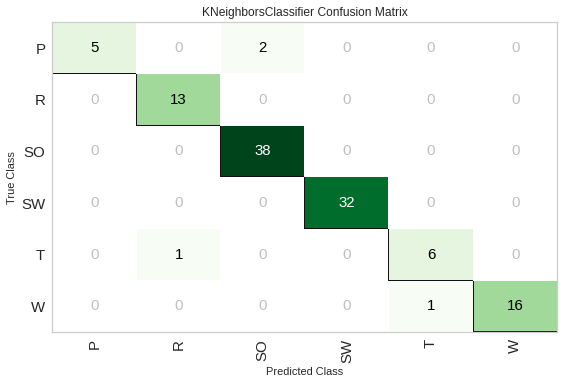

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [14]:
plot_model(tuned_knn, plot = 'confusion_matrix')

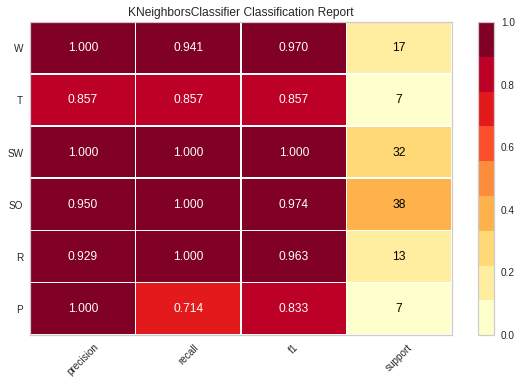

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [15]:
plot_model(tuned_knn, plot = 'class_report')

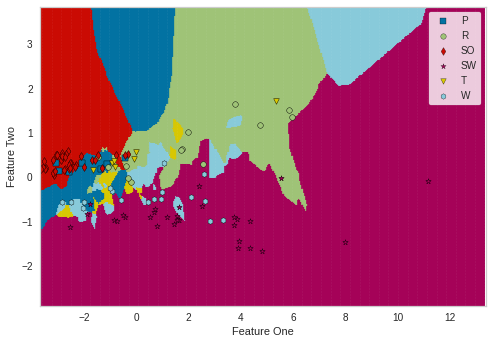

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [16]:
plot_model(tuned_knn, plot='boundary')

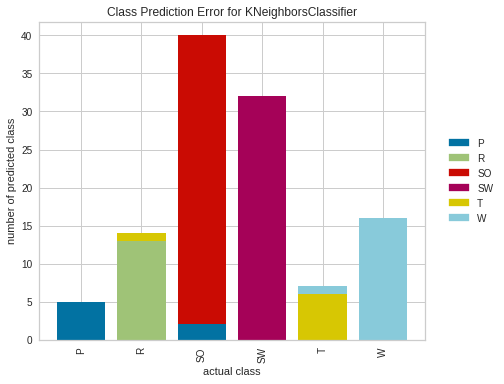

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [17]:
plot_model(tuned_knn, plot = 'error')

In [18]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
predict_model(tuned_knn);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9649,0.9819,0.9188,0.9664,0.9637,0.954,0.9545


In [20]:
final_knn = finalize_model(tuned_knn)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_ta

In [21]:
print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')


In [22]:
save_model(final_knn,'Final KNN Model 08Feb2020')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), model_name=Final KNN Model 08Feb2020, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='type',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='type',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                 ('fix_perfect', Remove_100(target='type')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
           

In [23]:
saved_final_knn = load_model('Final KNN Model 08Feb2020')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final KNN Model 08Feb2020, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [24]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='type',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('fix_perfect', Remove_100(target='type')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('d

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.0,0.9714,0,0,0,0,0


In [25]:
new_prediction.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type,Label,Score
0,5,61.92,4.78,50.46,3.47,49.52,4.41,56.95,2.73,29.07,2.83,SW,SW,1.0
1,20,113.84,4.80,100.71,4.39,43.95,5.08,133.27,7.41,70.91,2.69,SW,SW,1.0
2,48,182.00,9.14,196.00,7.41,60.48,6.76,91.00,6.55,57.24,8.23,SW,SW,1.0
3,52,175.00,9.12,201.00,7.24,55.21,6.08,74.38,5.43,39.62,7.87,SW,SW,1.0
4,62,30.11,2.54,28.72,2.34,20.66,2.17,57.89,2.38,34.75,2.52,SW,SW,1.0
